# VT1

This is the Script for the VT1 which shall fullfill the following tasks:


## Import of Packages

In [41]:
# Import of Packages
# import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import random

# Importing the Functions File
import Functions as fn

# Import of Excel Data
(General Format of Excel must be Headers followed by columns of Data)

In [42]:
# Reading the excel file and set it as a Dataframe
df = pd.read_excel("Sample.xlsx")

## Creating Scenarios
Calculation of Driftrate Mu and Standart Deviation Sigma


In [43]:
# Assign Variables with a specific Vector of the Dataframe
Year = np.array(df.iloc[:, 0])
Historic_Demand = np.array(df.iloc[:, 1])
Annual_Change = np.array(df.iloc[:, 2])
Percentage_Change = np.array(df.iloc[:, 3])
Outliner = np.array(df.iloc[:, 4])
# Percentage Change excluding the Outliners
Percentage_Change1 = np.array(df.iloc[:, 5])

# Caluclation of the Estimated Percentage Drift Rate Mu:
mu = np.nanmean(Percentage_Change1)
print("Mu = ", mu)
# Caluclation of the Estimated Percentage Standart Deviation Sigma:
sigma = np.nanstd(Percentage_Change1)
print("Simga = ", sigma)

Mu =  0.042754330256447565
Simga =  0.05813761525452841


Creating a Defined Number of Forecasts and Plotting them

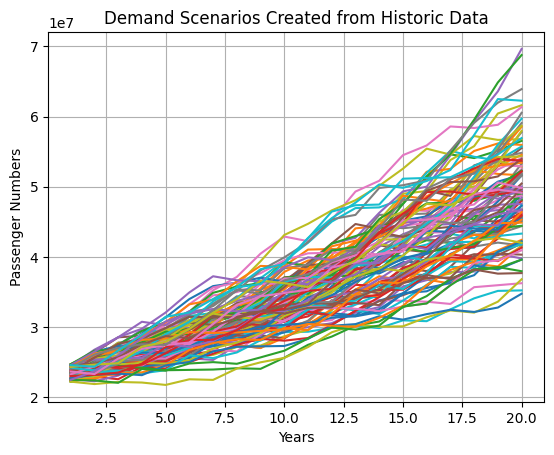

<Figure size 640x480 with 0 Axes>

In [44]:
# Demand at t0
# Dt0 = 22561132
Dt0 = Historic_Demand[-1]
# Steptime [Years]
dt = 1
# Time Horizon of Forecasts in Steptime
Fth = 20
# Number of Forecasts
Forecasts = 100

# Calling the Scenario Creation Function
Scenario = fn.Scenario_creation(mu, sigma, Dt0, dt, Fth, Forecasts)

# Calling the Scenario Plotting Function
fn.Scenario_plot(Scenario, Fth, True, "Demand Scenarios Created from Historic Data")

## Calculation of the Traditional NPV and ENPV


Inputs for NPV Calculation

In [45]:
th = 1000000  # Throughput Capacity per Unit of Capacity
r_D = 0.03  # Revenues per Unit of Demand per Period
r_K = 0.03  # Revenues per Unit of Capacity per Period
r_K_rent = 0.03  # Rental Revenues per Unit of Capacity per Period
co_K = 0.01  # Operational costs per unit of capacity per period
co_D = 0.004  # Operational cost per unit of demand per period
ci_K = 10  # Installation cost per unit of capacity
discount = 0.05  # Discount factor
EoS = 0.85  # EoS factor

# Assinging the Scenario as Demand
D = Scenario
# Rounding the Demand for further Calculations
D_rounded = np.ceil(D / 1000000)

Exporting Data (Mainly used for Programming and Cross Checking with Excel)

In [46]:
# Add initial Value for the Export
df_export = np.hstack((Dt0 * np.ones((D.shape[0], 1)), D))
# Change the shape to an Pandas Data Frame
df_export_2 = pd.DataFrame(df_export)
# Define Export File Name (if not found in Files a new one is created)
excel_file = "output.xlsx"
# Fill the Data Frame into the Excel File
df_export_2.to_excel(excel_file, index=False)

Creation of a mean Capacity Estimation

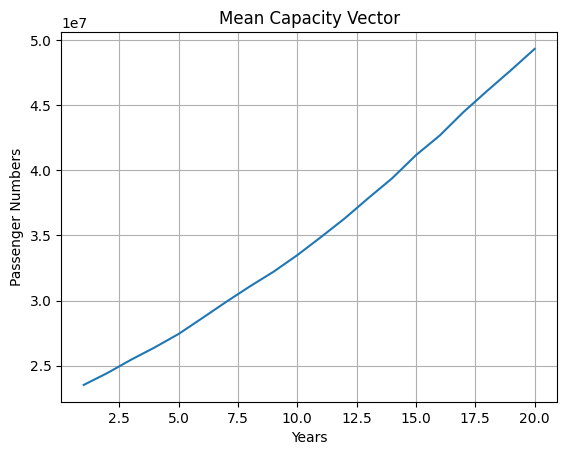

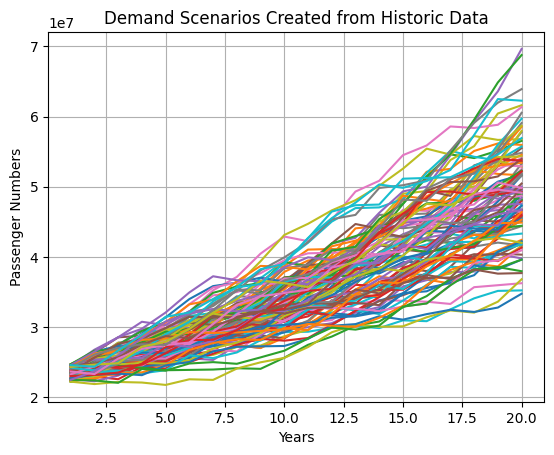

<Figure size 640x480 with 0 Axes>

In [47]:
# Calculating a Mean Scenario for the Estimation of the Capacity Vector
capacity_vector = np.mean(Scenario, axis=0)

# Plotting the Mean Sceanrio as Capacity Vector
fn.Scenario_plot(capacity_vector, Fth, True, "Mean Capacity Vector")
# Plotting the Demand (For Visual Comparison with the Mean Capacity Vector)
fn.Scenario_plot(Scenario, Fth, True, "Demand Scenarios Created from Historic Data")

Creation of a Staircase Vector based on the Capacity Estimation

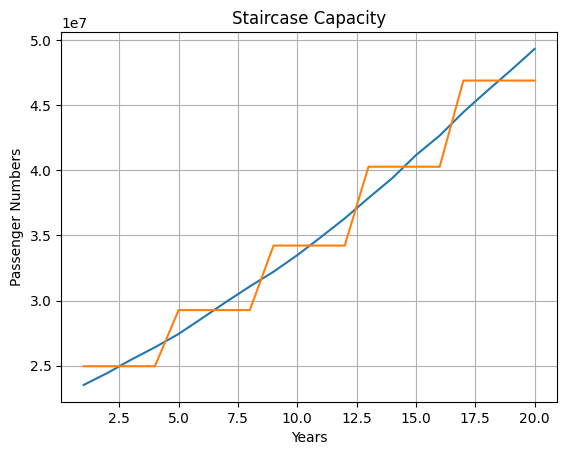

<Figure size 640x480 with 0 Axes>

In [48]:
# Number of Capacity Changes
num_steps = 5
# Qunatify the nonlinear Capacity Vector into a Step Vector
bin_size = len(capacity_vector) // num_steps
staircase_vector = np.zeros(len(capacity_vector))
for i in range(num_steps):
    start_idx = i * bin_size
    end_idx = (i + 1) * bin_size
    if i == num_steps - 1:
        end_idx = len(capacity_vector)
    avg_value = np.mean(capacity_vector[start_idx:end_idx])
    staircase_vector[start_idx:end_idx] = avg_value

# Estiamted Capacity Vector
K_est = staircase_vector
# Rounding the Estiamted Capacity Vector for further Calculations
K_est_rounded = np.ceil(K_est / 1000000)
# Combining the Mean Capacity Vector and the Staircase Capacity Vector for Plotting
Capacity_plot = np.array([capacity_vector, staircase_vector])
# Plotting the Combined Vector for Visual Inspection
fn.Scenario_plot(Capacity_plot, Fth, True, "Staircase Capacity")

Calling the NPV Calculation Function for Comparsion with the Excel Sheet

In [49]:
# Defined Capacity Vector in the Excel Sheet -> To compare results
K_excel_rounded = np.array(
    [25, 25, 25, 25, 30, 30, 30, 30, 30, 40, 40, 40, 40, 40, 50, 50, 50, 50, 50, 50]
)

# Calling the NPV Calculatio Function to compare with Excel
NPV_excel = fn.NPV_Calculation(D_rounded, K_excel_rounded, Fth, dt)
print("Traditional NPVs = ", NPV_excel)

Traditional NPVs =  [ 9102861.34855624  8711844.61655122 11212360.62515502  8625637.47132893
  7518074.93751627 11069859.81134164  7808021.60531227 11360879.96223528
 11366258.01103044  7174326.1009756   9000546.75682894 11507520.89395485
  9575909.41822378  8462836.72452515 10129614.80419434  8893512.66850828
 12919278.87521509 10082676.76114506  7935305.64523379  9226759.65432085
  8177884.83183583 11318583.25669466 10218875.21655617 10646036.96649069
 10189064.28979828  8036781.66274314 11608320.3288328   8725595.09264808
 10804218.06099362 12368550.89567666 11018274.12264197 11273443.24033303
 10339098.69897757  8599424.93122915 12322619.33494129  9464985.12213351
 10750022.96480649  9942471.52143382 10863592.12388313  8956025.11037465
 10700822.92617425  8860138.09685969 10375046.49202126  9002735.61743303
  8889674.1428867  11420036.48576869  9525395.23776406 11295088.81835763
 12690046.6740746   8451383.31629468  9824232.66164262  8583722.15298136
 11768316.80298552  7658045.612

Calculating the ENPV for Comparsion with the Excel Sheet

In [50]:
# Calculating the ENPV for the Excel Capacity Vector
ENPV_excel = np.mean(NPV_excel)
print("Traditional ENPV = ", ENPV_excel)

Traditional ENPV =  9919395.261580665


Calling the NPV Calculation Function for the Estimated Staircase Capacity Vector

In [51]:
# Calling the NPV Calculatio Function
NPV_est = fn.NPV_Calculation(D_rounded, K_est_rounded, Fth, dt)
print("Traditional NPVs = ", NPV_est)

Traditional NPVs =  [ 9587569.99424806  9266516.84566036 11382301.54010753  9199648.00660114
  8053408.86046235 11395701.73072253  8362693.83442141 11624362.66714005
 11484570.90238794  7709660.02392168  9593895.59826422 11612291.5434685
 10049590.5944297   8986863.94037166 10539747.0376073   9467523.20378048
 12919285.85209523 10587912.86727058  8470639.56817987  9731645.04816492
  8713218.7547819  11464133.86962033 10624247.78275119 10910105.88033863
 10592448.16599054  8572115.58568921 11813811.52195274  9260929.01559415
 11130622.98290025 12382988.41436056 11279268.28780083 11364636.85465765
 10740087.4234897   9154097.16033828 12395419.02889784 10007859.95964639
 11159718.11144082 10414336.07084856 11280161.38522561  9549373.95180993
 11159031.23221794  9414810.32596883 10894862.44166709  9557407.84654216
  9367343.85962502 11512338.01202621  9916106.54360494 11568471.08557946
 12690053.65095474  9044732.15772995 10270991.21433455  9119056.07592743
 11909716.60531641  8193379.5349

Calculating the ENPV for the Estimated Staircase Capacity Vector

In [52]:
# Calculating the ENPV for Staircase Capacity Vector
ENPV_est = np.mean(NPV_est)
print("Traditional ENPV = ", ENPV_est)

Traditional ENPV =  10299185.761997884


## Creating a Flexible Capacity Vector

In [53]:
# Initial Capacity
# K0 = 25
K0 = K_est_rounded[0]

# Capacity Increase in the Excel Sheet
deltaK_Flex_excel = 5
# Calling the Decision Rule for Excel Function to Create a Flexible Capacity Vector
Flexible_Capacity_Excel = fn.Decision_Rule_Excel(D_rounded, K0, deltaK_Flex_excel)

In [54]:
# Capacity Increase Vector for Comparison and Increase of Capacity
deltaK_Flex = [5, 8, 10]
# Calling the Decision Rule Function to Create a Flexible Capacity Vector
Flexible_Capacity = fn.Decision_Rule(D_rounded, K0, deltaK_Flex)

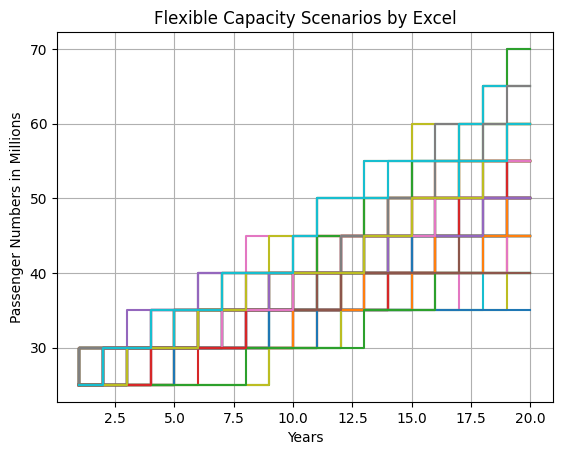

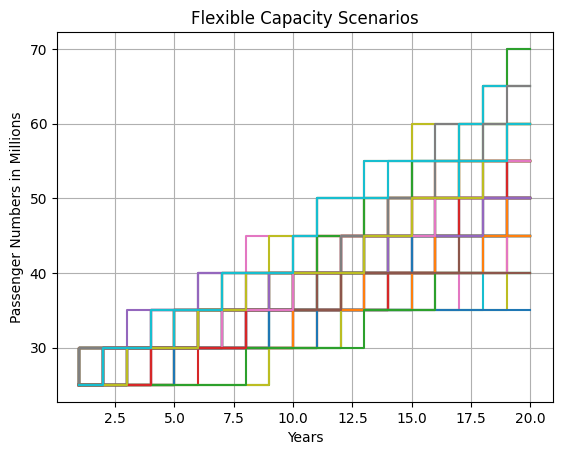

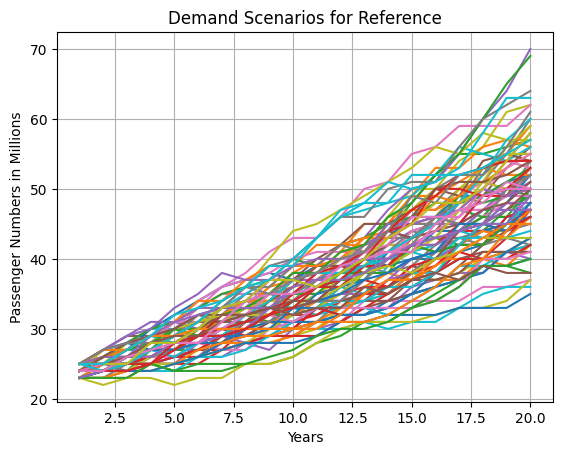

<Figure size 640x480 with 0 Axes>

In [55]:
# Plotting the Flexible Capacity Vectors


fn.Scenario_plot(
    Flexible_Capacity_Excel,
    Fth,
    False,

    "Flexible Capacity Scenarios by Excel",

    "Passenger Numbers in Millions",
)


fn.Scenario_plot(
    Flexible_Capacity,
    Fth,
    False,

    "Flexible Capacity Scenarios",

    "Passenger Numbers in Millions",
)

# Plotting the Demand (For Visual Comparison with the Flexible Capacity Vector)


fn.Scenario_plot(
    D_rounded,
    Fth,
    True,
    "Demand Scenarios for Reference",
    "Passenger Numbers in Millions",
)

## Calculation of NPV and ENPV using the Flexible Capacity Vector

In [56]:
# Calling the Flexible NPV Calculation Function
Flex_NPV_excel = fn.Flex_NPV_Calculation(D_rounded, Flexible_Capacity_Excel, Fth, dt)
print("Flexible Excel NPVs = ", Flex_NPV_excel)

# Calculating the ENPV for the Flexible Excel Capacity Vector
Flex_ENPV_excel = np.average(Flex_NPV_excel)
print("Flexible Excel ENPV = ", Flex_ENPV_excel)

Flexible Excel NPVs =  [ 9665902.66593492  9363209.91258993 10670505.50885922  9379357.38444808
  8567297.69416797 10781694.52773462  8947005.56816503 10955869.82956681
 11051721.51272146  8691629.97048833  9699426.54838095 10850647.68708619
  9743964.66465775  9415473.58904599 10419828.20800216  9590951.1180853
 12134245.13627643 10207634.08192119  9208497.24735877  9734548.53100966
  9071536.84511919 10665828.18141396 10134881.21847165 10471947.60692082
 10205819.1397565   8951577.75164903 11032156.93175149  9518523.94407997
 10507510.07959617 11587695.08805735 10394314.08962308 11041539.71982568
 10302729.62125859  9074309.50724921 11640705.23726718  9694342.45884951
 10213490.99148644 10035555.73747369 10649861.54624648  9699233.39414876
 10636593.33806641  9465045.28228071 10500184.09583852  9499481.32253304
  9465761.12453254 11064806.47974513  9727187.75967018 10845725.71028635
 11900358.09588868  9322430.98621721 10104072.05742214  9360919.41253828
 11177535.60867298  9198481.3

In [57]:
# Calling the Flexible NPV Calculation Function
Flex_NPV_est = fn.Flex_NPV_Calculation(D_rounded, Flexible_Capacity, Fth, dt)
print("Estimated Flexible Excel NPVs = ", Flex_NPV_est)

# Calculating the ENPV for the Estimated Flexible Capacity Vector
Flex_ENPV_est = np.average(Flex_NPV_est)
print("Estimated Flexible ENPV = ", Flex_ENPV_est)

Estimated Flexible Excel NPVs =  [ 9665902.66593492  9363209.91258993 10670505.50885922  9379357.38444808
  8567297.69416797 10781694.52773462  8947005.56816503 10955869.82956681
 11051721.51272146  8691629.97048833  9699426.54838095 10850647.68708619
  9743964.66465775  9415473.58904599 10419828.20800216  9590951.1180853
 12134245.13627643 10207634.08192119  9208497.24735877  9734548.53100966
  9071536.84511919 10665828.18141396 10134881.21847165 10471947.60692082
 10205819.1397565   8951577.75164903 11032156.93175149  9518523.94407997
 10507510.07959617 11587695.08805735 10394314.08962308 11041539.71982568
 10302729.62125859  9074309.50724921 11640705.23726718  9694342.45884951
 10213490.99148644 10035555.73747369 10649861.54624648  9699233.39414876
 10636593.33806641  9465045.28228071 10500184.09583852  9499481.32253304
  9465761.12453254 11064806.47974513  9727187.75967018 10845725.71028635
 11900358.09588868  9322430.98621721 10104072.05742214  9360919.41253828
 11177535.60867298 

Calculating the new ENPV

In [58]:
print("Excel ENPV = ", ENPV_excel)
print("Traditional ENPV = ", ENPV_est)
print("Flexible ENPV with Excel = ", Flex_ENPV_excel)
print("Flexible ENPV = ", Flex_ENPV_est)
print("If > 0 => Flexible Excel better -> ", Flex_ENPV_excel / ENPV_excel)
print("If > 0 => Flexible better -> ", Flex_ENPV_est / ENPV_est)

Excel ENPV =  9919395.261580665
Traditional ENPV =  10299185.761997884
Flexible ENPV with Excel =  10129920.868311174
Flexible ENPV =  10129920.868311174
If > 0 => Flexible Excel better ->  1.0212236332133984
If > 0 => Flexible better ->  0.9835652159696676


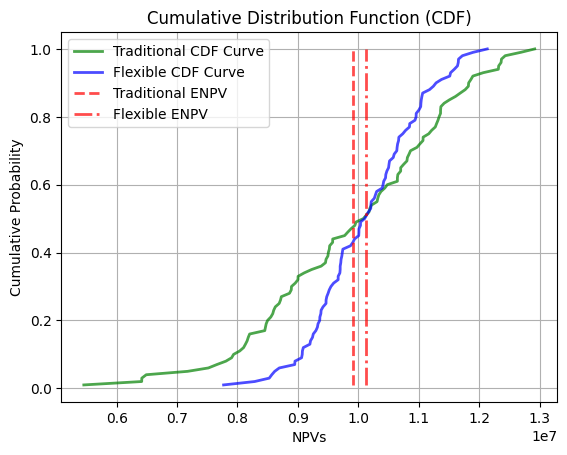

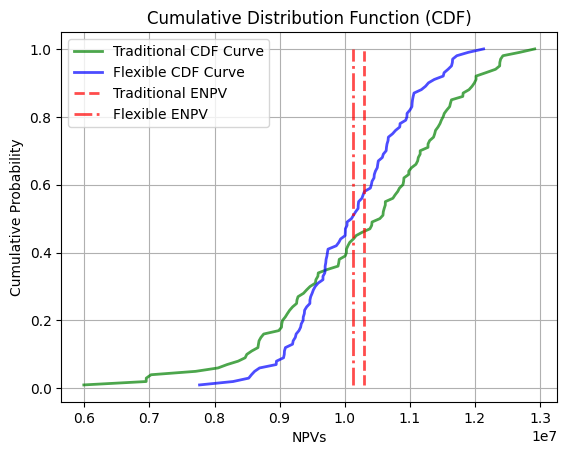

In [59]:
x_excel = NPV_excel
y_excel = Flex_NPV_excel
fn.CDF_Plot(x_excel, y_excel)

x = NPV_est
y = Flex_NPV_est
fn.CDF_Plot(x, y)

## Plotting Historic Data (For Reference Only)
Plotting Excel Data (Specific to Sample Excel, all other Inputs need to be adjusted to it)

In [60]:
# # Plotting Excel Data (only specific to Test Excel, keys needs to be changed for other
# # data)

# plt.plot(
#     Year,
#     Historic_Demand,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Demand for Zurich Airport")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Annual_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Change of Passenger Demand")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Percentage_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Percentage Change of Passenger Demand")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Percentage_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Change of Passenger Demand Excluding Outlayers")
# plt.legend()  # Display legend
# plt.figure()